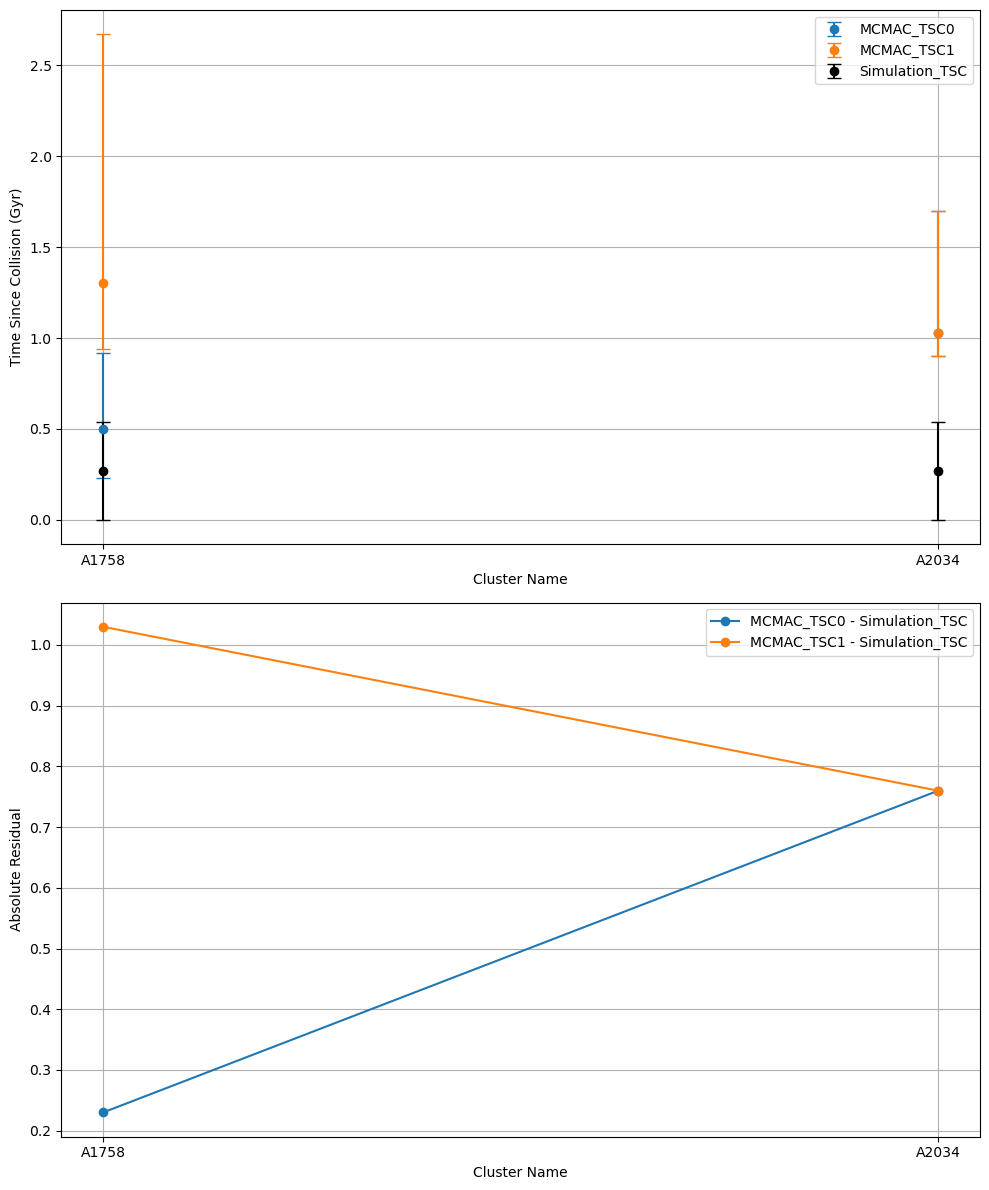

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# result_から始まる全てのcsvファイルを取得
csv_files = glob.glob("result_*.csv")

# CSVファイルを読み込み、DataFrameに結合
dataframes = [pd.read_csv(file) for file in csv_files]
df = pd.concat(dataframes, ignore_index=True)

# プロットの作成
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# 最初のプロット（Time Since Collisionのエラーバー付きプロット）
ax1.errorbar(df["ClusterName"], df["MCMAC_TSC0"], 
             yerr=[abs(df["MCMAC_TSC0"] - df["MCMAC_TSC0.lower"]), abs(df["MCMAC_TSC0.upper"] - df["MCMAC_TSC0"])], 
             fmt='o', label="MCMAC_TSC0", capsize=5)

ax1.errorbar(df["ClusterName"], df["MCMAC_TSC1"], 
             yerr=[abs(df["MCMAC_TSC1"] - df["MCMAC_TSC1.lower"]), abs(df["MCMAC_TSC1.upper"] - df["MCMAC_TSC1"])], 
             fmt='o', label="MCMAC_TSC1", capsize=5)

ax1.errorbar(df["ClusterName"], df["Simulation_TSC"], 
             yerr=[abs(df["Simulation_TSC"] - df["Simulation_TSC.lower"]), abs(df["Simulation_TSC.upper"] - df["Simulation_TSC"])], 
             fmt='o', label="Simulation_TSC", capsize=5, color='black')

ax1.set_xlabel("Cluster Name")
ax1.set_ylabel("Time Since Collision (Gyr)")
ax1.legend()
ax1.grid(True)

# 2つ目のプロット（Absolute Residualのプロット）
residual_MCMAC_TSC0 = df["MCMAC_TSC0"] - df["Simulation_TSC"]
residual_MCMAC_TSC1 = df["MCMAC_TSC1"] - df["Simulation_TSC"]

ax2.plot(df["ClusterName"], residual_MCMAC_TSC0, 'o-', label="MCMAC_TSC0 - Simulation_TSC")
ax2.plot(df["ClusterName"], residual_MCMAC_TSC1, 'o-', label="MCMAC_TSC1 - Simulation_TSC")

ax2.set_xlabel("Cluster Name")
ax2.set_ylabel("Absolute Residual")
ax2.legend()
ax2.grid(True)

# グラフを表示
plt.tight_layout()
plt.show()
